In [1]:
# Импорт библиотек
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import wilcoxon, mannwhitneyu,f_oneway
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW
from scipy.stats import chi2_contingency
from scipy.stats import norm
import statsmodels.stats.api as sms
from typing import List, Tuple, Dict, Set
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# A/B калькулятор https://www.evanmiller.org/ab-testing/chi-squared.html

In [3]:
# Создаем данные
# x1 = np.random.normal(0, 1.5, 100)
# y1 = np.random.normal(0, 1.5, 100)
x1 = [64.2, 28.4, 85.3, 83.1, 13.4, 56.8, 44.2, 90, 86, 75]
y1 = [45, 29.5, 32.3, 49.3, 18.3, 34.2, 43.9, 13.8, 27.4, 43.4]

# Тест, отличается ли среднее выборки от N

In [4]:
N=10
stats.ttest_1samp(x1, N)

Ttest_1sampResult(statistic=6.265559754169641, pvalue=0.00014688203506718392)

# Доверительный интервал для среднего

In [5]:
np.mean(x1)

62.64

In [6]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [7]:
mean_confidence_interval(x1)

(62.64, 43.63452280102512, 81.64547719897487)

In [8]:
def mean_confidence_interval_(data, confidence=0.95):
    return stats.t.interval(confidence, len(data)-1, loc=np.mean(data), scale=stats.sem(data))

In [9]:
mean_confidence_interval_(x1)

(43.63452280102512, 81.64547719897487)

# t-тест двух независимых выборок

### Проверка на нормальность данных

In [10]:
# Тест Шапиро-Уилка
stat, p = stats.shapiro(x1)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.894, p-value=0.189
Принять гипотезу о нормальности


###  Проверка гипотезы

In [11]:
# H0 - между выборками нет статистически значимых различий
# H1 - между выборками есть статистически значимые различия
stats.ttest_ind(x1, y1)

Ttest_indResult(statistic=3.145198441422933, pvalue=0.005596956346997708)

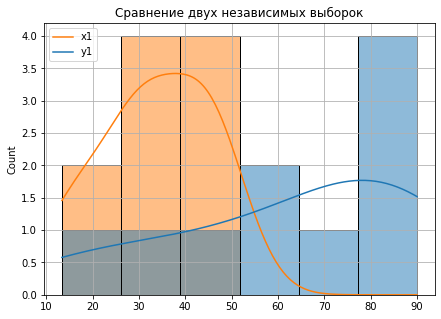

In [12]:
plt.figure(figsize=(7, 5))
df1 = pd.DataFrame({'x1':x1,'y2':y1})
sns.histplot(data=df1, kde=True)
plt.title('Сравнение двух независимых выборок')
plt.legend(['x1', 'y1'])
plt.grid()

### Доверительный интервал разности средних для двух независимых выборок

In [13]:
def mean_diff_confint_ind(sample1,sample2):
    cm = CompareMeans(DescrStatsW(sample1), DescrStatsW(sample2))
    return cm.tconfint_diff(usevar='unequal')

In [14]:
# Построим 95% доверительный интервал для разности средних. Данный интервал не содержит ноль - значит разницу можно признать отличной от нуля.
mean_diff_confint_ind(x1,y1)

(8.967258335059267, 48.89274166494074)

# t-тест двух зависимых выборок

In [15]:
# Создаем данные
x2 = np.random.normal(0, 1.5, 100)
y2 = np.random.normal(1, 1.5, 100)

### Проверка на нормальность данных

In [16]:
# Критерий Пирсона
stat, p = stats.normaltest(x2)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=3.706, p-value=0.157
Принять гипотезу о нормальности


### Проверка гипотезы

In [17]:
# H0 - между выборками нет статистически значимых различий
# H1 - между выборками есть статистически значимые различия
stats.ttest_rel(x2, y2)

Ttest_relResult(statistic=-4.760976988370981, pvalue=6.587284794125499e-06)

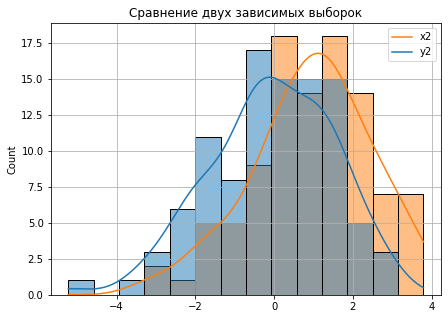

In [18]:
plt.figure(figsize=(7, 5))
df2 = pd.DataFrame({'x2':x2,'y2':y2})
sns.histplot(data=df2, kde=True)
plt.title('Сравнение двух зависимых выборок')
plt.legend(['x2', 'y2'])
plt.grid()

# Непараметрические критерии

### U-критерий Манна — Уитни

In [19]:
#  Статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, 
# измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

In [20]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A + stats.norm.rvs(scale=54,loc=11,size=100)

In [21]:
# H0 - различий нет
# H1 - различия есть
stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет')
else:
    print('Различия в эффекте есть')

Statistics=4343.000, p=0.054
Различий в эффекте нет


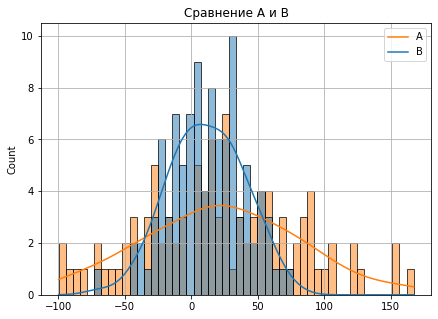

In [22]:
plt.figure(figsize=(7, 5))
df = pd.DataFrame({'A':A, 'B':B})
sns.histplot(data=df, kde=True, bins=50)
plt.title('Сравнение A и B')
plt.legend(['A', 'B'])
plt.grid()

### Т-критерий Вилкоксона

In [23]:
# Также используются названия Т-критерий Уилкоксона, критерий Вилкоксона, критерий знаковых рангов Уилкоксона, критерий суммы рангов Уилкоксона.
# Непараметрический статистический тест (критерий), используемый для проверки различий между двумя выборками парных или независимых измерений по уровню
# какого-либо количественного признака, измеренного в непрерывной или в порядковой шкале. Впервые предложен Фрэнком Уилкоксоном. 
# Другие названия — W-критерий Вилкоксона, критерий знаковых рангов Вилкоксона, критерий Уилкоксона для связных выборок. 
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни.

In [24]:
np.random.seed(11)
C = stats.norm.rvs(scale=30,loc=11,size=100)
D = C + stats.norm.rvs(scale=54,loc=11,size=100)

In [25]:
# H0 - различий нет
# H1 - различия есть
stat, p = wilcoxon(C,D)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет')
else:
    print('Различия в эффекте есть')

Statistics=1930.000, p=0.041
Различия в эффекте есть


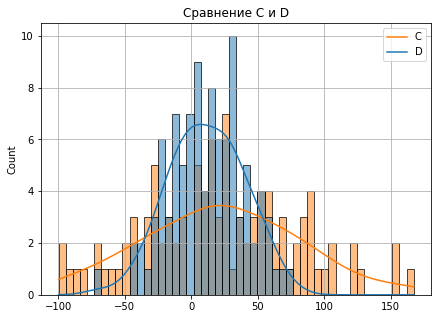

In [26]:
plt.figure(figsize=(7, 5))
df = pd.DataFrame({'C':C, 'D':D})
sns.histplot(data=df, kde=True, bins=50)
plt.title('Сравнение C и D')
plt.legend(['C', 'D'])
plt.grid()

###  Бутстреп

In [27]:
group1 = np.array([1,2,3,4,5,6,7,8,9,10])
group2 = np.array([10,11,12,13,14,15])

In [28]:
def get_bootstrap_samples(data, n_samples):
    """Бутстрап-выборка"""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [29]:
def stat_intervals(stat, alpha=0.05):
    """Доверительный интервал"""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [30]:
group1_median = list(map(np.median, get_bootstrap_samples(group1, 1000)))
group2_median  = list(map(np.median, get_bootstrap_samples(group2, 1000)))

In [31]:
delta_median = list(map(lambda x: x[1] - x[0], zip(group1_median, group2_median)))

In [32]:
print ("Макc значение для для группы1:", np.max(group1),"Мин значение для для группы1:", np.min(group1))
print ("Макc значение для для группы2:", np.max(group2),"Мин значение для для группы2:", np.min(group2))
print ("95% доверительный интервал для группы1:", stat_intervals(group1_median, 0.05))
print ("95% доверительный интервал для группы2:",  stat_intervals(group2_median, 0.05))
print ("95% доверительный интервал для разности медиан:",  stat_intervals(delta_median, 0.05))

Макc значение для для группы1: 10 Мин значение для для группы1: 1
Макc значение для для группы2: 15 Мин значение для для группы2: 10
95% доверительный интервал для группы1: [3. 8.]
95% доверительный интервал для группы2: [10.5 14.5]
95% доверительный интервал для разности медиан: [ 3.5 10. ]


# Корреляция

### Коэффициент корреляции Пирсона

In [33]:
df = pd.read_csv('data1.txt', sep=',', decimal='.')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      int64  
 1   x2      5 non-null      int64  
 2   x3      5 non-null      int64  
 3   y1      5 non-null      float64
 4   y2      5 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 328.0 bytes


,x1,x2,x3,y1,y2
0,2,0,2,0.2,11.0
1,3,-21,3,0.3,-30.2
2,4,0,4,0.4,12.0
3,15,-30,5,0.5,-42.5
4,18,12,6,0.6,43.0


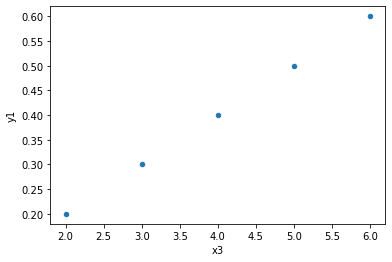

In [34]:
df.plot(kind='scatter', x='x3', y='y1')

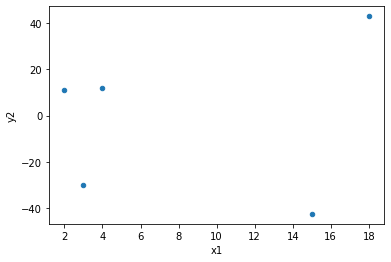

In [35]:
df.plot(kind='scatter', x='x1', y='y2')

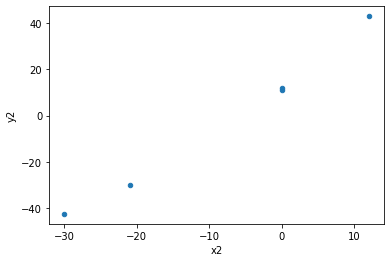

In [36]:
df.plot(kind='scatter', x='x2', y='y2')

In [37]:
# Коэффициент корреляции Пирсона (r-Пирсона) применяется для исследования взаимосвязи двух переменных, измеренных в метрических шкалах на одной и той же выборке. 
# Он позволяет определить, насколько пропорциональная изменчивость двух переменных.
df[['x2', 'y2']].corr()

,x2,y2
x2,1.000000,0.994319
y2,0.994319,1.000000


### Коэффициент ранговой корреляции Спирмена

In [38]:
# Непараметрический метод, который используется с целью статистического изучения связи между явлениями. 
# В этом случае определяется фактическая степень параллелизма между двумя количественными рядами изучаемых признаков и дается оценка тесноты установленной связи с помощью количественно выраженного коэффициента.
df[['x2', 'y2']].corr(method='spearman')

,x2,y2
x2,1.000000,0.974679
y2,0.974679,1.000000


#Дисперсионный анализ

### ANOVA

In [39]:
H = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
I= [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
J = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

In [40]:
# H0 - различий нет
# H1 - различия есть
F, p = f_oneway(H, I,J)
print('F=%.3f, p=%.5f' % (F, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет')
else:
    print('Различия в эффекте есть')

F=12.526, p=0.00003
Различия в эффекте есть


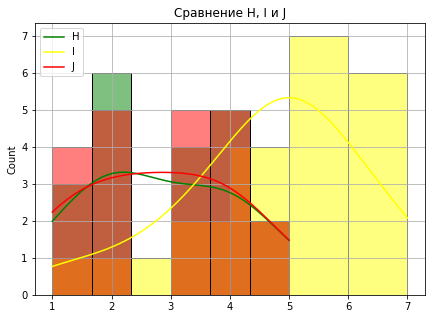

In [41]:
plt.figure(figsize=(7, 5))
sns.histplot(H, kde=True, color='green')
sns.histplot(I, kde=True, color='yellow')
sns.histplot(J, kde=True, color='red')
plt.title('Сравнение H, I и J')
plt.legend(['H', 'I', 'J'])
plt.grid()

# Пропорции

# Доли

### Размер выборки

In [42]:
def proportions_sample_size (baseline_rate,practical_significance,confidence_level=0.05, sensitivity=0.8):
  effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
  sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                                alpha = confidence_level, ratio=1)
  return round(sample_size)

In [43]:
proportions_sample_size(0.2,0.05)

1092

### Тест разности двух независимых долей

In [44]:
# Реклама "А" получает 3252 откликов на 3730 просмотров, реклама "В" 3872 на 3968
clicks = [290, 430] #отклики в каждой группе
views  = [300, 450] #просмотры в каждой группе

In [45]:
# Расчет конверсии
p1 = clicks[0]/views[0]
p2 = clicks[1]/views[1]

In [46]:
def confidence_interval(conversion:float, trials:int) -> List[float]:
  '''Функция для нахождения доверительного интервала'''
  sigma = math.sqrt(conversion *(1-conversion )/ trials)
  mu = conversion
  probability = 0.95
  interval = stats.norm.interval(probability, loc=mu, scale=sigma)
  interval_round = [round(_*100, 1) for _ in interval]
  return interval_round

In [47]:
# Расчет z метрики
p_combined = (clicks[0] + clicks[1]) / (views[0] + views[1])
difference = p1 - p2
z_scores = difference /math.sqrt(p_combined * (1 - p_combined) * (1/views[0] + 1/views[1]))

In [48]:
def proportions_diff_z_stat_ind(clicks1, views1, clicks2, views2, alpha = 0.05):
  p1 = clicks1/views1
  p2 = clicks2/views2
  p = float(p1*views1 + p2*views2) / (views1 + views2)
  return (p1 - p2) / np.sqrt(p * (1 - p) * (1 / views1 + 1 / views2))

In [49]:
proportions_diff_z_stat_ind(290,300,430,450)

0.7607257743127277

In [50]:
print(f"Значение z равно {z_scores}")
print(f"Конверсия вариант А равна {round(p1*100,1)}% \
        Доверительный интервал {confidence_interval(p1, views[0])[0]}% - {confidence_interval(p1, views[0])[1]}%")
print(f"Конверсия вариант В равна {round(p2*100,1)}% \
        Доверительный интервал {confidence_interval(p2, views[1])[0]}% - {confidence_interval(p2, views[1])[1]}%")

Значение z равно 0.7607257743127277
Конверсия вариант А равна 96.7%         Доверительный интервал 94.6% - 98.7%
Конверсия вариант В равна 95.6%         Доверительный интервал 93.7% - 97.5%


In [51]:
# Рассчитываем p-value
p_value = (1 - scipy.stats.norm.cdf(abs(z_scores))) * 2
print('p-значение: {:f}'.format(p_value))

p-значение: 0.446821


In [52]:
alpha = .05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [53]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - norm.cdf(z_stat)

In [54]:
print('p-значение: {:f}'.format(proportions_diff_z_test(z_scores)))

p-значение: 0.446821


### Коэффициента корреляции Мэтьюса

In [55]:
# Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин;
# реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.
# Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары.

In [56]:
def Matthews_correlation(a, b, c, d):
    return (a*d-b*c)/np.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [57]:
men_visit_monthly = 239
women_visit_monthly = 203
men_visit_rarely = 515
women_visit_rarely = 718
print ("Коэффициента корреляции Мэтьюса: %.3f" % np.round(Matthews_correlation(men_visit_monthly, men_visit_rarely, 
                                                                       women_visit_monthly, women_visit_rarely), 3))

Коэффициента корреляции Мэтьюса: 0.109


### Доверительный интервал для разности двух незавимых долей

In [58]:
# В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре?
# Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин.
# Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [59]:
def proportions_confint_diff_ind(p1, count1, p2, count2, alpha = 0.05):    
    z = norm.ppf(1 - alpha / 2.)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    
    return (left_boundary, right_boundary)

In [60]:
all_men = men_visit_monthly + men_visit_rarely
all_women = women_visit_monthly + women_visit_rarely
men_proportion = float(men_visit_monthly)/float(all_men)
women_proportion = float(women_visit_monthly)/float(all_women)
conf_interval_diff = proportions_confint_diff_ind(men_proportion, all_men, women_proportion, all_women)
print ("Доверительный интервал: [%.4f, %.4f]" % (np.round(conf_interval_diff[0],4),np.round(conf_interval_diff[1],4)))

Доверительный интервал: [0.0539, 0.1392]


### Тест Хи-квадрат

In [61]:
# В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля.
# Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency.

In [62]:
chi_stat = chi2_contingency([[men_visit_monthly, men_visit_rarely], [women_visit_monthly, women_visit_rarely]])
print ("Хи-квадрат: %f" % chi_stat[1])

Хи-квадрат: 0.000011


### Тест Фишера

In [63]:
df3 = pd.DataFrame([[10,15],[39,34]], index=['Рост','Снижение'], columns=['Прогноз','Факт'])
print(df3)

          Прогноз  Факт
Рост           10    15
Снижение       39    34


In [64]:
# H0 - эффект случайный
# H1 - эффект не случайный
oddsratio, pvalue = stats.stats.fisher_exact(df3)
print(pvalue)

0.35417955365927367


#Прочее. 

### Z-оценка

In [65]:
list_number = [7,8,8,7.5,9]

In [66]:
# Рассчитываем среднее
mean = np.mean(list_number)
print(mean)

7.9


In [67]:
# Рассчитываем дисперсию
var = np.var(list_number,ddof=1)
print(var)

0.55


In [68]:
# Рассчитываем стандартное отклонение
std = round(np.std(list_number,ddof=1),2)
print(std)

0.74


In [69]:
# Рассчитаем z-оценку для 7.5
z = (7.5-mean)/std
print(z)

-0.540540540540541


In [70]:
# Такая Z-оценка означает, что число 7,5 удалено на -0,54 стандартных отклонений от среднего значения выборки.
# Z-оценка может быть как положительной, так и отрицательной.
# Отрицательная Z-оценка указывает на то, что выбранное число выборки меньше среднего значения, 
# а положительная Z-оценка – на то, что число больше среднего значения.